## 라이브러리 임포트

In [1]:
# Library import - data preprocessing 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

In [2]:
## Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
# torch
import torch 

In [4]:
# 평가지표
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import spearmanr

In [5]:
# visulazation
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [6]:
# font manager
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
# tqdm
from tqdm import tqdm

In [8]:
# kaggle hub
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [9]:
## GPU check
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용중인 디바이스:", device)

사용중인 디바이스: cuda


In [10]:
print("CUDA 사용 가능?", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("GPU를 사용할 수 없습니다.")

CUDA 사용 가능? True
사용 중인 GPU: NVIDIA GeForce MX450


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
import re

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [17]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wonny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.8 MB 1.1 MB/s eta 0:00:12
     ---------------------------------------- 0.1/12.8 MB 1.0 MB/s eta 0:00:13
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.2/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.3/12.8 MB 1.1 MB/s eta 0:00:11
     - -------------------------------------- 0.3/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.6/12.8 MB 1.2 MB/s


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

## Data Load

In [82]:
# 파일 경로
file_path = r"C:\Users\wonny\OneDrive\문서\카카오톡 받은 파일\movie 10000.csv"

# 데이터 로드
df = pd.read_csv(file_path)

In [83]:
df.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,date,keyword
0,8kggT2ej-lo,Would You Pet a Cheetah in Africa?,MrBeast,24,[none],816300646,27859737,0,39299,https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg,1.05,documentary film
1,H42zWaD4A4s,The World's Highest Security Prison: CECOT (Th...,Ruhi Çenet,27,ruhi çenet|ruhi cenet|documentary|ruhi cenet d...,112036494,2009246,0,67146,https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg,9.02,documentary film
2,aNUYGRn3W9Q,COBRA GYPSIES - Full Documentary,Raphael Treza,1,Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...,56065571,333002,0,31177,https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg,28.02,documentary film
3,0UJYYkK4d8s,"June 6, 1944 – The Light of Dawn | History - D...",Best Documentary,25,WWII|war|operation overlord|world war II|norma...,53961215,326635,0,16146,https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg,18.02,documentary film
4,XmtXC_n6X6Q,Our Planet | From Deserts to Grasslands | FULL...,Netflix,24,education|netflix education|documentary|our pl...,42082072,229371,0,7689,https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg,17.04,documentary film


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        9350 non-null   object 
 1   title           9350 non-null   object 
 2   channel_title   9350 non-null   object 
 3   category_id     9350 non-null   int64  
 4   tags            9350 non-null   object 
 5   views           9350 non-null   int64  
 6   likes           9350 non-null   int64  
 7   dislikes        9350 non-null   int64  
 8   comment_count   9350 non-null   int64  
 9   thumbnail_link  9350 non-null   object 
 10  date            9350 non-null   float64
 11  keyword         9350 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 876.7+ KB


## Data preprocessing

### function definition

In [85]:
def preprocess_title(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 형태소 분석
    doc = nlp(text)

    # 4. 명사/형용사 + 불용어 제거 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)


In [86]:
def preprocess_description(text):
    if not isinstance(text, str):
        return ""

    # 1. 소문자 변환
    text = text.lower()

    # 2. 특수문자, 숫자 제거 (알파벳만 남김)
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. spaCy 분석
    doc = nlp(text)

    # 4. 불용어 제거 + 명사/형용사 + 원형 복원
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha
        and not token.is_stop
        and token.pos_ in ['NOUN', 'ADJ', 'PROPN', 'VERB', 'NUM', 'ADV', 'INTJ']
    ]

    return ' '.join(tokens)

In [87]:
def count_pos(text):
    if not isinstance(text, str):
        return {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    doc = nlp(text.lower())
    pos_counts = {'NOUN': 0, 'PROPN': 0, 'ADJ': 0, 'VERB': 0, 'INTJ': 0, 'NUM': 0}

    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    return pos_counts

In [88]:
def extract_common_words(row):
    title_words = set(row['cleaned_title'].split())
    desc_words = set(row['cleand_desc'].split())
    common = title_words & desc_words  # 교집합
    return ' '.join(common) if common else ''

### target scaling

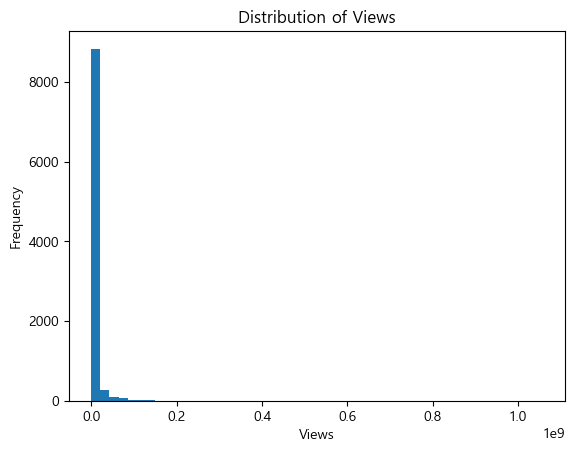

In [89]:
# target 분포 확인 
plt.hist(df['views'], bins=50)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Distribution of Views')
plt.show()

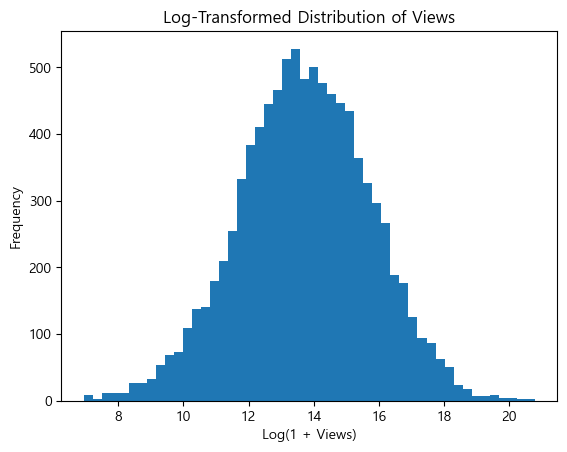

In [90]:
# target log scaling 
df['log_views'] = np.log1p(df['views'])

plt.hist(df['log_views'], bins=50)
plt.xlabel('Log(1 + Views)')
plt.ylabel('Frequency')
plt.title('Log-Transformed Distribution of Views')
plt.show()

In [91]:
# log_views 열을 표준화
scaler = StandardScaler()
df['log_views_scaled'] = scaler.fit_transform(df[['log_views']])

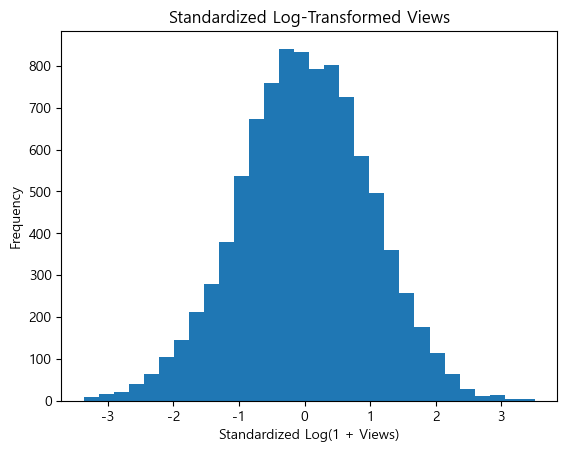

In [92]:
plt.hist(df['log_views_scaled'], bins=30)
plt.title("Standardized Log-Transformed Views")
plt.xlabel("Standardized Log(1 + Views)")
plt.ylabel("Frequency")
plt.show()

### 제목 전처리 

In [93]:
df['cleaned_title'] = df['title'].apply(preprocess_title)

In [94]:
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,date,keyword,log_views,log_views_scaled,cleaned_title
0,8kggT2ej-lo,Would You Pet a Cheetah in Africa?,MrBeast,24,[none],816300646,27859737,0,39299,https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg,1.05,documentary film,20.520293,3.379239,pet cheetah africa
1,H42zWaD4A4s,The World's Highest Security Prison: CECOT (Th...,Ruhi Çenet,27,ruhi çenet|ruhi cenet|documentary|ruhi cenet d...,112036494,2009246,0,67146,https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg,9.02,documentary film,18.534335,2.392694,world high security prison cecot evil keep
2,aNUYGRn3W9Q,COBRA GYPSIES - Full Documentary,Raphael Treza,1,Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...,56065571,333002,0,31177,https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg,28.02,documentary film,17.842032,2.048785,cobra gypsy documentary
3,0UJYYkK4d8s,"June 6, 1944 – The Light of Dawn | History - D...",Best Documentary,25,WWII|war|operation overlord|world war II|norma...,53961215,326635,0,16146,https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg,18.02,documentary film,17.803776,2.029781,june light dawn history dday world war ii docu...
4,XmtXC_n6X6Q,Our Planet | From Deserts to Grasslands | FULL...,Netflix,24,education|netflix education|documentary|our pl...,42082072,229371,0,7689,https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg,17.04,documentary film,17.555132,1.906264,planet desert grassland episode netflix


### 품사별 count

In [95]:
# 각 제목에서 품사별 개수 추출
pos_df = df['title'].apply(count_pos).apply(pd.Series)

# 기존 df와 합치기
df = pd.concat([df, pos_df], axis=1)

In [96]:
df

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,keyword,log_views,log_views_scaled,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM
0,8kggT2ej-lo,Would You Pet a Cheetah in Africa?,MrBeast,24,[none],816300646,27859737,0,39299,https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg,...,documentary film,20.520293,3.379239,pet cheetah africa,1,1,0,1,0,0
1,H42zWaD4A4s,The World's Highest Security Prison: CECOT (Th...,Ruhi Çenet,27,ruhi çenet|ruhi cenet|documentary|ruhi cenet d...,112036494,2009246,0,67146,https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg,...,documentary film,18.534335,2.392694,world high security prison cecot evil keep,4,1,2,1,0,0
2,aNUYGRn3W9Q,COBRA GYPSIES - Full Documentary,Raphael Treza,1,Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...,56065571,333002,0,31177,https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg,...,documentary film,17.842032,2.048785,cobra gypsy documentary,3,0,1,0,0,0
3,0UJYYkK4d8s,"June 6, 1944 – The Light of Dawn | History - D...",Best Documentary,25,WWII|war|operation overlord|world war II|norma...,53961215,326635,0,16146,https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg,...,documentary film,17.803776,2.029781,june light dawn history dday world war ii docu...,7,3,0,0,0,3
4,XmtXC_n6X6Q,Our Planet | From Deserts to Grasslands | FULL...,Netflix,24,education|netflix education|documentary|our pl...,42082072,229371,0,7689,https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg,...,documentary film,17.555132,1.906264,planet desert grassland episode netflix,6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,fI1Fqh31hmU,Common worries among us... #moving #k-drama #D...,K-D-M,22,#King the Land|#Lee Junho|#Im Yoona|#Go Wonhee...,1108,51,0,11,https://i.ytimg.com/vi/fI1Fqh31hmU/default.jpg,...,moving movie,7.011214,-3.331537,common worry move kdrama disneyplus jo seong h...,6,4,1,1,0,0
9346,5hUnB3hhM4o,무빙 구룡포 불주먹으로 100대1 싸움 폼미쳤다 #moving #디즈니플러스 #류승룡,숏씨네(short cine),1,disney+|무빙2|구룡포|무빙액션,1122,8,0,0,https://i.ytimg.com/vi/5hUnB3hhM4o/default.jpg,...,moving movie,7.023759,-3.325305,move,3,5,0,1,0,1
9347,G8sZMYIwCCA,"김성균, 아이언맨 저리가라 강렬한 파워 착지 #무빙(MOVING)",KOREA VIBE | 코리아 바이브,24,한류타임즈|뉴스|한류|hanryu|아이돌|팬투|fantoo|hanryutimes|k...,1033,18,0,0,https://i.ytimg.com/vi/G8sZMYIwCCA/default.jpg,...,moving movie,6.941190,-3.366322,move,1,4,0,0,0,1
9348,dF_QjuSWjGM,2024 연극 '엔젤스 인 아메리카' MOVING POSTER - 로이 이효정,글림컴퍼니,22,[none],1046,47,0,3,https://i.ytimg.com/vi/dF_QjuSWjGM/default.jpg,...,moving movie,6.953684,-3.360116,move poster,3,2,0,1,0,1


### 조회수 상위 영상에서 자주 등장하는 단어 확인

--------------------------------------------------------------------------------------------------------

조회수가 높은 영상들에서 자주 등장하는 단어 확인하기 (tf-idf)

In [97]:
# 조회수 기준 상위 영상 vs 하위 영상 비교 
top_df = df[df['views'] >= df['views'].quantile(0.90)].copy()
bottom_df = df[df['views'] >= df['views'].quantile(0.10)].copy()

In [98]:
## tf-idf
# 벡터화 객체 생성
vectorizer = TfidfVectorizer(
    stop_words='english',      # 영어 불용어 제거
    max_features=1000,         # 상위 5000개의 단어만 사용
    ngram_range=(1, 2)         # unigram + bigram 사용
)

In [99]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

In [100]:
# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 30개 단어 보기
print(tfidf_df.head(30))

             word      score
511         movie  64.819116
813         short  48.342396
167        comedy  35.373153
287         funny  24.729613
333         hindi  21.968784
3          action  20.932666
272          film  20.341564
792         scene  18.223394
936         video  17.067586
321            hd  16.227666
634      official  15.215428
606       netflix  15.094661
309          good  14.985718
955           war  14.747840
346        horror  14.523768
436          love  14.102374
39      animation  13.766009
213           dub  13.230482
767      romantic  12.457904
611           new  12.446458
336     hindi dub  12.153340
7    action movie  11.939159
589         music  10.505418
848          song   9.918649
943         viral   9.668175
209         drama   9.486347
919         trend   9.335196
853         south   9.109077
388        kdrama   8.998847
916       trailer   8.798194


-----------------------------------------------------------------------------------------------------------

전체 데이터에서 출현 빈도가 높은 단어들 확인하기 (countvectorizer) 

In [101]:
#CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X_counts = vectorizer.fit_transform(top_df['cleaned_title']) 

# 단어별 빈도 계산
word_counts = X_counts.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

# 정리
count_df = pd.DataFrame({'word': words, 'count': word_counts})
count_df = count_df.sort_values('count', ascending=False)

In [102]:
count_df[count_df['count']>50]

,word,count
619,movie,509
788,short,275
162,comedy,177
406,hindi,127
286,funny,102
16,action,97
384,hd,72
268,film,68
765,scene,65
221,dub,63


----------------------------------------------------------------------------------------------------------

In [103]:
keywords = [
        
]

pattern = r'\b(?:' + '|'.join(keywords) + r')\b'

df['has_rank_related'] = df['title'].str.lower().str.contains(pattern)

In [104]:
df['has_rank_related'].sum()

np.int64(9350)

### 조회수 상위 / 하위 영상 비교 

In [105]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(top_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(30))

          word  score
619      movie    509
788      short    275
162     comedy    177
406      hindi    127
286      funny    102
16      action     97
384         hd     72
268       film     68
765      scene     65
221        dub     63
930      video     61
639        new     57
318       good     53
947        war     52
561       love     51
430     horror     49
638    netflix     47
649   official     47
739   romantic     43
54   animation     42
815      south     39
903      trend     35
936      viral     33
811       song     32
627      music     32
218      drama     29
107  bollywood     27
888   thriller     26
652        old     25
901    trailer     24


In [106]:
# 벡터화 수행
X_tfidf = vectorizer.fit_transform(bottom_df['cleaned_title'])

# 단어 목록 추출
tfidf_words = vectorizer.get_feature_names_out()

# 단어별 TF-IDF 점수 합계 구하기
word_scores = X_tfidf.toarray().sum(axis=0)
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': word_scores})
tfidf_df = tfidf_df.sort_values('score', ascending=False)

# 상위 20개 단어 보기
print(tfidf_df.head(30))

            word  score
582        movie   7457
782        short   1510
379        hindi   1164
721       review   1012
348         good   1005
4         action    969
304         film    727
607          new    679
389       horror    655
169       comedy    622
897     thriller    584
249          dub    565
964          war    508
514         love    505
816        south    500
366           hd    419
246        drama    417
269      english    410
734     romantic    395
837        story    369
506         list    361
623          old    347
755        scifi    300
968        watch    298
106    bollywood    297
477       korean    293
750        scene    277
412       indian    265
236  documentary    263
946        video    262


### clustering

In [124]:
## 클러스터링 
titles = df['cleaned_title']

#TF-IDF 벡터화
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

#단어 벡터 추출 (문서-단어 행렬 전치 → 단어 x 문서 행렬)
X_words = X_tfidf.T

#KMeans 클러스터링
n_clusters = 3  # 군집 수는 실험하면서 조정 가능
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
word_labels = kmeans.fit_predict(X_words)

#클러스터 결과 정리
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

#클러스터별 단어 리스트 확인
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

#클러스터별 단어 출력
for idx, row in cluster_groups.iterrows():
    print(f"📌 Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)

📌 Cluster 0:
documentary, documentary film, film, movie, scifi, scifi movie, short, war
--------------------------------------------------
📌 Cluster 1:
aamir, aamir khan, ace, achilldayinmylife, achilldayinmylife adayinmylife, achilldayinmylife documentary, action, action adventure, action film, action movie, action new, action romantic, action scifi, action thriller, action war, actionmovie, actor, adayinmylife, adayinmylife achilldayinmylife, adayinmylife documentary, advani, adventure, adventure movie, agent, ai, aishwarya, ajay, ajay devgn, akshay, akshay kumar, ali, alia, alien, allu, allu arjun, alur, alur cerita, amazing, amazon, amazon prime, america, amitabh, amitabh bachchan, amrish, anand, animal, animate, animate movie, animate short, animation, animation movie, animation short, anime, anime movie, arjun, army, attack, attitude, aur, avenger, award, babu, baby, bachchan, bad, bad superhero, bangla, bangla explanation, base, base true, batman, battle, bbc, bear, beautiful, b

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import pandas as pd

# 1. TF-IDF 벡터화
titles = df['cleaned_title']

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=1000,
    ngram_range=(1, 2)
)
X_tfidf = vectorizer.fit_transform(titles)

# 2. 단어 벡터 (문서-단어 행렬 → 전치)
X_words = X_tfidf.T.toarray()  # sparse → dense

# 3. DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.6, min_samples=2, metric='cosine')  # 거리 기반은 cosine 추천
word_labels = dbscan.fit_predict(X_words)

# 4. 결과 정리
words = vectorizer.get_feature_names_out()
cluster_df = pd.DataFrame({'word': words, 'cluster': word_labels})

# 5. 클러스터별 단어 출력
cluster_groups = cluster_df.groupby('cluster')['word'].apply(list).reset_index(name='words')

for idx, row in cluster_groups.iterrows():
    print(f"📌 Cluster {row['cluster']}:")
    print(", ".join(row['words']))
    print("-" * 50)


📌 Cluster -1:
ace, action adventure, action film, action romantic, action scifi, action thriller, action war, actor, agent, ai, aishwarya, ali, alien, amazing, america, anand, animal, animation short, army, attack, attitude, aur, avenger, away, baby, batman, battle, bbc, bear, beautiful, begin, bhojpuri, billionaire, black, blockbuster hindi, boss, box, boy, brahmanandam, break, broadway, brother, brutal, bt, bully, cartoon animation, case, castle, cat, cdrama, ceo, challenge, change, channel, character, child, chinesedrama, chopra, chris, cinta, city, collection, college, come, comedy film, comedy funny, comedy scene, comedy short, comedyfilm, comedyvideo, compilation, complete, couple, crazy, creature, creepy, crime movie, cut, cute, dan, dance, dangerous, dark, david, day, dc, dead, deadly, deadpool, death, dharmendra, di, dialogue, die, dil, dinosaur, director, disney, disney movie, disneyplus, doctor, dog, doll, door, doraemon, dragon, drama explain, drama korea, dream, dub action

In [134]:
#제목, 단어 클러스터, 조회수 데이터 준비
titles = df['cleaned_title'].astype(str).tolist()
views = df['views'].tolist()
word_cluster_map = dict(zip(cluster_df['word'], cluster_df['cluster']))  # 단어 → 클러스터번호

#제목별 포함된 클러스터 목록 만들기
title_clusters = []

for title in titles:
    found_clusters = set()
    for word in word_cluster_map:
        if word in title:
            found_clusters.add(word_cluster_map[word])
    title_clusters.append(list(found_clusters))

#각 클러스터 번호 기준으로 해당되는 조회수 모으기
cluster_to_views = {}

for clusters, view in zip(title_clusters, views):
    for c in clusters:
        if c not in cluster_to_views:
            cluster_to_views[c] = []
        cluster_to_views[c].append(view)

#평균 조회수 계산
cluster_avg_views = {
    c: np.mean(vlist) for c, vlist in cluster_to_views.items() if len(vlist) > 0
}

#결과 출력
for c, avg in sorted(cluster_avg_views.items()):
    print(f"📊 Cluster {c} - 평균 조회수: {round(avg):,}회")

📊 Cluster -1 - 평균 조회수: 5,954,226회
📊 Cluster 0 - 평균 조회수: 1,264,888회
📊 Cluster 1 - 평균 조회수: 2,985,644회
📊 Cluster 2 - 평균 조회수: 4,572,668회
📊 Cluster 3 - 평균 조회수: 3,276,058회
📊 Cluster 4 - 평균 조회수: 3,342,268회
📊 Cluster 5 - 평균 조회수: 2,701,475회
📊 Cluster 6 - 평균 조회수: 4,810,114회
📊 Cluster 7 - 평균 조회수: 8,017,301회
📊 Cluster 8 - 평균 조회수: 2,113,981회
📊 Cluster 9 - 평균 조회수: 6,995,733회
📊 Cluster 10 - 평균 조회수: 1,414,138회
📊 Cluster 11 - 평균 조회수: 1,687,405회
📊 Cluster 12 - 평균 조회수: 6,248,407회
📊 Cluster 13 - 평균 조회수: 5,594,603회
📊 Cluster 14 - 평균 조회수: 10,187,695회
📊 Cluster 15 - 평균 조회수: 8,769,664회
📊 Cluster 16 - 평균 조회수: 6,675,996회
📊 Cluster 17 - 평균 조회수: 5,276,333회
📊 Cluster 18 - 평균 조회수: 3,716,830회
📊 Cluster 19 - 평균 조회수: 5,442,562회
📊 Cluster 20 - 평균 조회수: 2,679,077회
📊 Cluster 21 - 평균 조회수: 2,263,178회
📊 Cluster 22 - 평균 조회수: 210,858회
📊 Cluster 23 - 평균 조회수: 1,117,577회
📊 Cluster 24 - 평균 조회수: 5,040,282회
📊 Cluster 25 - 평균 조회수: 5,238,660회
📊 Cluster 26 - 평균 조회수: 6,216,403회
📊 Cluster 27 - 평균 조회수: 4,778,084회
📊 Cluster 28 - 평균 조회수: 3,

In [131]:
from sklearn.metrics import silhouette_score

for eps in [0.2, 0.3, 0.4, 0.5, 0.6]:
    for min_pts in [2, 3, 5]:
        db = DBSCAN(eps=eps, min_samples=min_pts, metric='cosine')
        labels = db.fit_predict(X_words)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print(f"eps={eps}, min_samples={min_pts} → clusters: {n_clusters}, noise: {n_noise}")


eps=0.2, min_samples=2 → clusters: 67, noise: 835
eps=0.2, min_samples=3 → clusters: 23, noise: 923
eps=0.2, min_samples=5 → clusters: 2, noise: 989
eps=0.3, min_samples=2 → clusters: 90, noise: 772
eps=0.3, min_samples=3 → clusters: 33, noise: 886
eps=0.3, min_samples=5 → clusters: 3, noise: 983
eps=0.4, min_samples=2 → clusters: 114, noise: 705
eps=0.4, min_samples=3 → clusters: 42, noise: 849
eps=0.4, min_samples=5 → clusters: 5, noise: 971
eps=0.5, min_samples=2 → clusters: 137, noise: 621
eps=0.5, min_samples=3 → clusters: 58, noise: 779
eps=0.5, min_samples=5 → clusters: 10, noise: 940
eps=0.6, min_samples=2 → clusters: 151, noise: 534
eps=0.6, min_samples=3 → clusters: 77, noise: 682
eps=0.6, min_samples=5 → clusters: 15, noise: 895


### 조회수 구간별 제목 길이 및 단어 수

In [109]:
# 단어 수 계산
df['title_cnt'] = df['cleaned_title'].apply(lambda x: len(x.split()))

# 확인
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,log_views_scaled,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt
0,8kggT2ej-lo,Would You Pet a Cheetah in Africa?,MrBeast,24,[none],816300646,27859737,0,39299,https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg,...,3.379239,pet cheetah africa,1,1,0,1,0,0,True,3
1,H42zWaD4A4s,The World's Highest Security Prison: CECOT (Th...,Ruhi Çenet,27,ruhi çenet|ruhi cenet|documentary|ruhi cenet d...,112036494,2009246,0,67146,https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg,...,2.392694,world high security prison cecot evil keep,4,1,2,1,0,0,True,7
2,aNUYGRn3W9Q,COBRA GYPSIES - Full Documentary,Raphael Treza,1,Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...,56065571,333002,0,31177,https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg,...,2.048785,cobra gypsy documentary,3,0,1,0,0,0,True,3
3,0UJYYkK4d8s,"June 6, 1944 – The Light of Dawn | History - D...",Best Documentary,25,WWII|war|operation overlord|world war II|norma...,53961215,326635,0,16146,https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg,...,2.029781,june light dawn history dday world war ii docu...,7,3,0,0,0,3,True,9
4,XmtXC_n6X6Q,Our Planet | From Deserts to Grasslands | FULL...,Netflix,24,education|netflix education|documentary|our pl...,42082072,229371,0,7689,https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg,...,1.906264,planet desert grassland episode netflix,6,0,1,0,0,0,True,5


In [110]:
# 제목 길이 계산 
df['title_len'] = df['title'].apply(lambda x: len(x))

# 확인
df.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,cleaned_title,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len
0,8kggT2ej-lo,Would You Pet a Cheetah in Africa?,MrBeast,24,[none],816300646,27859737,0,39299,https://i.ytimg.com/vi/8kggT2ej-lo/default.jpg,...,pet cheetah africa,1,1,0,1,0,0,True,3,34
1,H42zWaD4A4s,The World's Highest Security Prison: CECOT (Th...,Ruhi Çenet,27,ruhi çenet|ruhi cenet|documentary|ruhi cenet d...,112036494,2009246,0,67146,https://i.ytimg.com/vi/H42zWaD4A4s/default.jpg,...,world high security prison cecot evil keep,4,1,2,1,0,0,True,7,72
2,aNUYGRn3W9Q,COBRA GYPSIES - Full Documentary,Raphael Treza,1,Gypsy (Film)|Snake (Animal)|Adventure (TV Genr...,56065571,333002,0,31177,https://i.ytimg.com/vi/aNUYGRn3W9Q/default.jpg,...,cobra gypsy documentary,3,0,1,0,0,0,True,3,32
3,0UJYYkK4d8s,"June 6, 1944 – The Light of Dawn | History - D...",Best Documentary,25,WWII|war|operation overlord|world war II|norma...,53961215,326635,0,16146,https://i.ytimg.com/vi/0UJYYkK4d8s/default.jpg,...,june light dawn history dday world war ii docu...,7,3,0,0,0,3,True,9,77
4,XmtXC_n6X6Q,Our Planet | From Deserts to Grasslands | FULL...,Netflix,24,education|netflix education|documentary|our pl...,42082072,229371,0,7689,https://i.ytimg.com/vi/XmtXC_n6X6Q/default.jpg,...,planet desert grassland episode netflix,6,0,1,0,0,0,True,5,64


-----------------------------------------------------------------------------------------------------------

조회수 구간별로 평균값에 차이가 있는지 확인

In [111]:
# 구간 5구간으로 분할 
df['views_bin'] = pd.qcut(df['views'], q=3, labels=[1,2,3])

In [112]:
grouped = df.groupby('views_bin').agg({
    'title_cnt': 'mean',
    'views': 'mean',
    'title_cnt' : 'mean',
    'title_len' : 'mean'
}).reset_index()

print(grouped)

  views_bin  title_cnt         views  title_len
0         1   7.740135  1.529646e+05  71.460058
1         2   7.906290  1.038253e+06  70.801027
2         3   7.957010  1.727149e+07  71.756817


C:\Users\wonny\AppData\Local\Temp\ipykernel_2280\1109606012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('views_bin').agg({


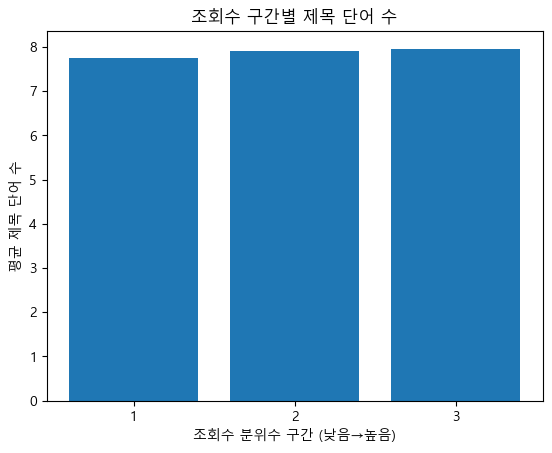

In [113]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_cnt'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 단어 수')
plt.show()

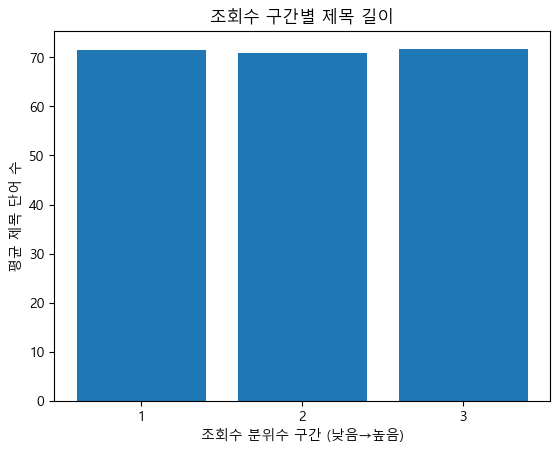

In [114]:
plt.bar(grouped['views_bin'].astype(str), grouped['title_len'])
plt.xlabel('조회수 분위수 구간 (낮음→높음)')
plt.ylabel('평균 제목 단어 수')
plt.title('조회수 구간별 제목 길이')
plt.show()

In [64]:
# 분위수 구간별로 title_cnt 분리
group1 = df[df['views_bin'] == 1]['title_cnt']
group2 = df[df['views_bin'] == 2]['title_cnt']
group3 = df[df['views_bin'] == 3]['title_cnt']

# ANOVA 테스트
f_stat, p_val = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

NameError: name 'f_oneway' is not defined

### description과 title에 겹치는 단어 있는지 확인

In [153]:
game_df

,title,views,likes,description,log_views,log_views_scaled,cleaned_title,cleand_desc,NOUN,PROPN,ADJ,VERB,INTJ,NUM,has_rank_related,title_cnt,title_len,views_bin
131,L.A. Noire - Nintendo Switch Trailer,154872,7683,Amid the post-war boom of Hollywood's Golden A...,11.950361,-1.291706,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
392,L.A. Noire - Nintendo Switch Trailer,161231,7803,Amid the post-war boom of Hollywood's Golden A...,11.990600,-1.265922,la noire nintendo switch trailer,postwar boom hollywood golden age cole phelp l...,2,4,0,0,0,0,True,5,36,1
405,Our First Date,224426,17784,Here's an animation short of our First Date! W...,12.321306,-1.054013,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
619,Our First Date,463992,25840,Here's an animation short of our First Date! W...,13.047625,-0.588606,date,here animation short date excited hear think l...,1,0,1,0,0,0,False,1,14,1
652,Playing CUPHEAD with MatPat!,55460,3871,"After my appearance on GTLive, MatPat (Game Th...",10.923435,-1.949735,play cuphead matpat,appearance gtlive matpat game theory play cuph...,1,1,0,1,0,0,False,3,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,"Pokémon: Let's Go, Pikachu! and Pokémon: Let's...",9992803,230507,Return to the Kanto region and experience a cl...,16.117376,1.378417,pokmon let pikachu pokmon let eevee trailer,return kanto region experience classic pokmon ...,2,3,0,4,0,0,True,7,65,3
40911,The Sims 4 Seasons: Official Reveal Trailer,1749832,77408,Add weather to your Sims’ lives to tell new st...,14.375031,0.261964,sims season official reveal trailer,add weather sim live tell new story enjoy seas...,3,0,1,1,0,1,True,5,43,2
40919,The History of Fortnite Battle Royale - Did Yo...,324219,7840,Thanks to Skillshare for sponsoring this video...,12.689178,-0.818290,history fortnite battle royale know game feat ...,thank skillshare sponsor video people sign lin...,4,1,1,2,0,0,True,8,72,1
40936,LIE DETECTOR TEST WITH MY GIRLFRIEND!,3229540,109945,Talia: https://www.youtube.com/user/nataliahad...,14.987851,0.654644,lie detector test girlfriend,talia httpswwwyoutubecomusernataliahaddockjosh...,4,0,0,0,0,0,False,4,37,3


In [155]:
# 겹치는 단어 탐색
game_df['common_words'] = game_df.apply(extract_common_words, axis=1)

In [156]:
# 개수까지 같이 세기
game_df['n_common_words'] = game_df['common_words'].apply(lambda x: len(x.split()) if x else 0)

In [158]:
game_df['n_common_words']

131      4
392      4
405      1
619      1
652      2
        ..
40874    4
40911    0
40919    6
40936    0
40948    4
Name: n_common_words, Length: 817, dtype: int64

In [169]:
# 조회수 구간에 따라 차이가 있는지 확인 
grouped = game_df.groupby('views_bin').agg({
    'views' : 'mean',
    'n_common_words': 'mean',
    'NOUN' : 'mean',
    'PROPN' : 'mean',
    'VERB' : 'mean',
    'INTJ' : 'mean',
    'NUM' : 'mean'
}).reset_index()

print(grouped)

  views_bin         views  n_common_words      NOUN     PROPN      VERB  INTJ  \
0         1  3.300992e+05        3.032967  2.604396  1.637363  0.769231   0.0   
1         2  1.630028e+06        2.338235  2.691176  1.073529  0.779412   0.0   
2         3  5.910787e+06        2.959559  3.474265  0.591912  0.852941   0.0   

        NUM  
0  0.472527  
1  0.352941  
2  0.312500  


C:\Users\wonny\AppData\Local\Temp\ipykernel_22328\2622363220.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = game_df.groupby('views_bin').agg({


-----------------------------------------------------------------------------------------------------------

### 최종 예측

------------------------------------------------------------------------------------------------------

키워드 사전 구축

In [65]:
# 조회수가 높은 영상에 자주 등장하는 키워드 사전 구축 
keywords = [
    "movie", "short", "comedy", "funny", "hindi", "action", "netflix", "film",
    "animation", "horror", "scene", "official", "comedy short", "romantic",
    "video", "trend", "dub", "hd", "hindi dub"
]

hype_words = ['insane', 'crazy', 'unbelievable', 'god', '1v5', 'clutch']

특징 추출 함수 정의

In [67]:
def extract_features(row):
    features = {}

    # 원본 텍스트
    title = row['title'] if isinstance(row['title'], str) else ''

    # 전처리된 텍스트
    cleaned_title = preprocess_title(title)

    # 제목 길이 및 단어 수 
    features['title_len'] = len(title)
    features['title_cnt'] = len(cleaned_title.split())

    # 느낌표 / 물음표 개수
    features['num_exclamations'] = title.count('!')
    features['num_questions'] = title.count('?')

    # 숫자 포함 여부 
    features['has_number'] = int(bool(re.search(r'\d', title)))
    features['starts_with_number'] = int(bool(re.match(r'^\d', title.strip())))  

    # 키워드 포함 여부 
    keywords = [
    "movie", "short", "comedy", "funny", "hindi", "action", "netflix", "film",
    "animation", "horror", "scene", "official", "comedy short", "romantic",
    "video", "trend", "dub", "hd", "hindi dub"
]

    
    features['has_keyword'] = int(any(word in cleaned_title for word in keywords))

    # 대문자 비율 30% 이상 여부
    features['is_caps_heavy'] = int(sum(1 for c in title if c.isupper()) > len(title) * 0.3)

    # 품사 카운트
    pos_counts = count_pos(title)
    features.update(pos_counts)

    return features


점수 계산 함수 정의

In [68]:
def compute_rule_score(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += -0.03 * features['title_len']

    # 2. 단어 수: 
    score -= 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score += 0.3 * features['num_exclamations']
    score += 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score += 0.5 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.1 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score += 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.8 * features.get('NOUN', 0)
    score += 0.5 * features.get('VERB', 0)
    score += -0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    return score

실제 적용할 데이터에서 사용할 칼럼만 불러오기

In [135]:
movie = df[['title', 'views']].copy()

타겟 스케일링

In [136]:
# target scaling
movie['log_views'] = np.log1p(movie['views'])

scaler = StandardScaler()
movie['scaled_views'] = scaler.fit_transform(movie[['log_views']])

In [137]:
movie = movie.drop(columns = ['views', 'log_views'])
movie

,title,scaled_views
0,Would You Pet a Cheetah in Africa?,3.379239
1,The World's Highest Security Prison: CECOT (Th...,2.392694
2,COBRA GYPSIES - Full Documentary,2.048785
3,"June 6, 1944 – The Light of Dawn | History - D...",2.029781
4,Our Planet | From Deserts to Grasslands | FULL...,1.906264
...,...,...
9345,Common worries among us... #moving #k-drama #D...,-3.331537
9346,무빙 구룡포 불주먹으로 100대1 싸움 폼미쳤다 #moving #디즈니플러스 #류승룡,-3.325305
9347,"김성균, 아이언맨 저리가라 강렬한 파워 착지 #무빙(MOVING)",-3.366322
9348,2024 연극 '엔젤스 인 아메리카' MOVING POSTER - 로이 이효정,-3.360116


In [138]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9350 entries, 0 to 9349
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         9350 non-null   object 
 1   scaled_views  9350 non-null   float64
dtypes: float64(1), object(1)
memory usage: 146.2+ KB


함수 적용

In [ ]:
movie['features'] = movie.apply(extract_features, axis=1)

In [ ]:
movie['rule_score'] = movie['features'].apply(compute_rule_score)

### (예측 1) 지수함수로 예측

In [ ]:
def score_to_views(score, base=1e5):
    return int(base * np.exp(score / 3))

In [ ]:
movie['predicted_views'] = movie['rule_score'].apply(score_to_views)

In [ ]:
movie[['title', 'scaled_views', 'rule_score', 'predicted_views']].sort_values(by='scaled_views', ascending=False).head()

In [ ]:
# 예측값을 log-scaling + standardization한 것과 맞추려면:
pred_scaled = np.log1p(movie['predicted_views'])
pred_scaled = (pred_scaled - pred_scaled.mean()) / pred_scaled.std()

# 실제값
true_scaled = movie['scaled_views']

In [ ]:
rmse = mean_squared_error(movie['scaled_views'], pred_scaled, squared=False)
r2 = r2_score(true_scaled, pred_scaled)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

### (예측 2) Linear Regression

In [ ]:
# X, y 정의
X = movie[['rule_score']]  # 독립 변수: rule 기반 점수
y = movie['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

가중치 수정을 위한 회귀계수 확인

In [ ]:
# 피처 추출
features_df = game.apply(extract_features, axis=1, result_type='expand')

# 독립변수(X), 종속변수(y)
X = features_df.drop(columns = 'common_words', errors = 'ignore')  
y = game['scaled_views']

# 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 성능 평가
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

# 결과 출력
print("RMSE:", round(rmse, 4))
print("R²:", round(r2, 4))

# 계수 확인
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("\n Feature Importance (계수):")
print(coefficients)

-----------------------------------------------------------------------------------------------------

점수 가중치 수정 후 다시 예측

In [94]:
def compute_rule_score_modified(features):
    score = 0

    # 1. 제목 길이: 짧을수록 가산점
    score += 0.03 * features['title_len']

    # 2. 단어 수: 적을수록 클릭 유도 가능성 있음
    score += 0.3 * features['title_cnt']

    # 3. 느낌표 / 물음표 개수
    score -= 0.3 * features['num_exclamations']
    score -= 0.3 * features['num_questions']

    # 4. 숫자 포함 여부
    score -= 0.7 * features['has_number']

    # 5. 숫자로 시작
    score -= 0.8 * features['starts_with_number']

    # 6. 키워드 포함 여부
    score -= 0.8 * features['has_keyword']

    # 7. 대문자 비율이 높은 경우
    score -= 0.3 * features['is_caps_heavy']

    # 8. 품사 기반: 명사·동사 많으면 내용 풍부, 고유명사 많으면 오히려 일반성↓
    score += 0.7 * features.get('NOUN', 0)
    score += 0.7 * features.get('VERB', 0)
    score += 0.1 * features.get('PROPN', 0)  # 고유명사 많으면 가중치 낮춤

    return score

In [95]:
game['rule_score_modified'] = game['features'].apply(compute_rule_score_modified)

In [96]:
# X, y 정의
X = game[['rule_score_modified']]  # 독립 변수: rule 기반 점수
y = game['scaled_views']  # 종속 변수: log + 표준화된 조회수

# 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 예측
y_pred = model.predict(X)

# 평가 지표 출력
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.9943
R²: 0.0114


C:\Users\wonny\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
